In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [3]:
from job_utils.idxpckl import Indexed_Pickle

In [4]:
root_dir = '/media/akumar/Data/nse/'

In [5]:
lasso = pd.read_pickle('%s/finalfinal/lasso_concat_df.dat' % root_dir)
mcp = pd.read_pickle('%s/finalfinal/mcp_concat_df.dat' % root_dir)
scad = pd.read_pickle('%s/finalfinal/scad_concat_df.dat' % root_dir)
en = pd.read_pickle('%s/finalfinal/en_concat_df.dat' % root_dir)

In [6]:
from plotting_utils import *

## FPR vs. FNR plots

In [ ]:
### PLOTS TO DO: 
# (1) selection criteria curves
# (2) alpha and eta scaling
# (3) bias/variance
# (4) N and SNR scaling of selection accuracy

# Anything else should be well motivated (what is the narrative missing?)

In [7]:
kappa = np.unique(lasso['kappa'].values)
sparsity = np.unique(lasso['sparsity'].values)

In [8]:
# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]
markers = ['o', 's', '^']

/home/akumar/anaconda3/envs/nse/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


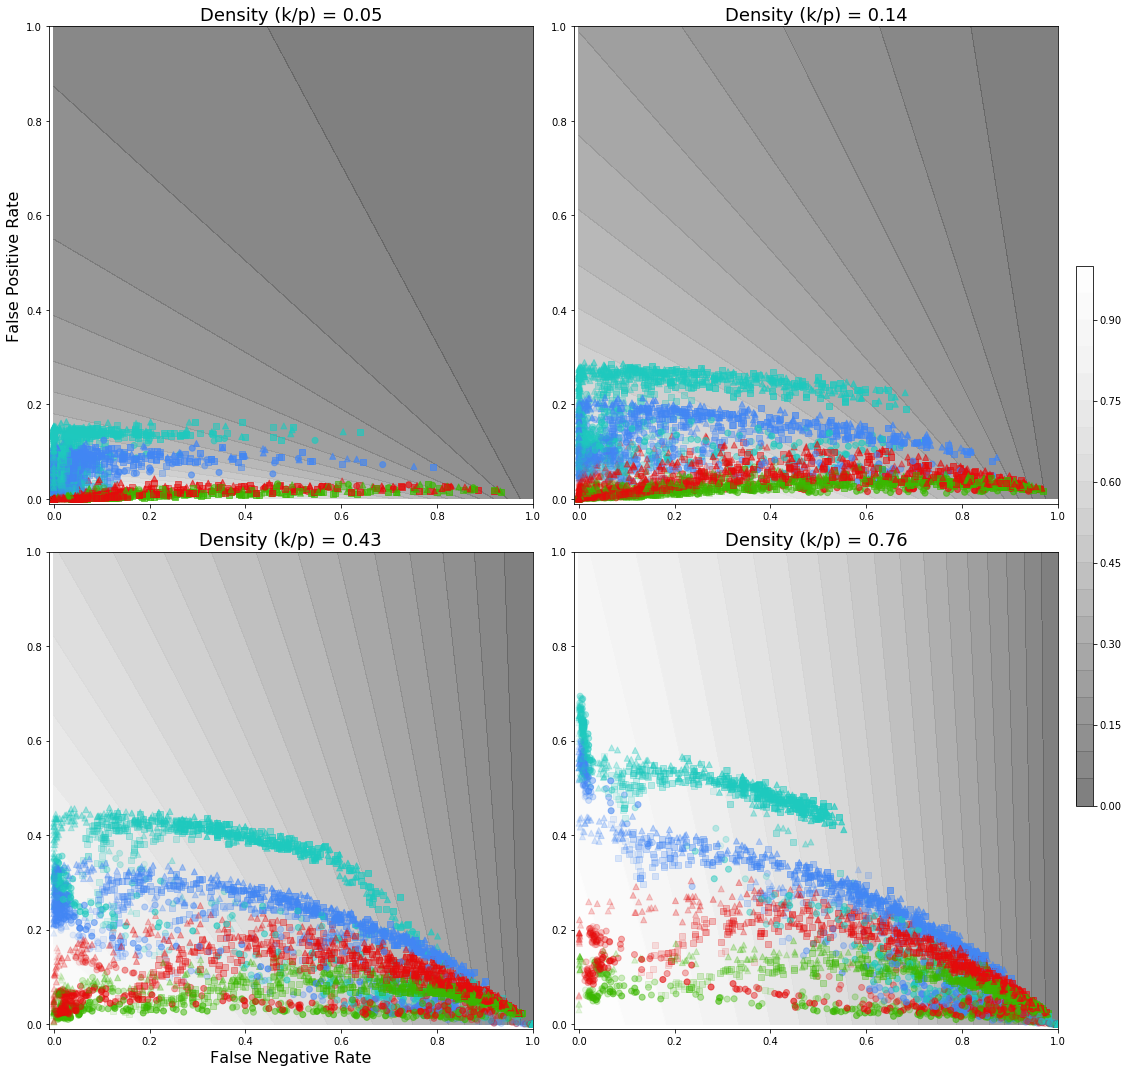

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[3], sparsity[7], sparsity[11], sparsity[13]]
kappa_ = kappa
# Fix the number of samples!
np_ratio = 4
dframes = [lasso, mcp, scad, en]
selection_method = 'BIC'

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Superimpose contours of constant selection accuracy
    xx = np.linspace(0, 1, 100)
    yy = np.linspace(0, 1, 100)
    z = np.zeros((100, 100))
    for ix, x in enumerate(xx):
        for iy, y in enumerate(yy):
            z[ix, iy] = 1 - ((1 - s)* y + s * x)/(s * (2 - x - y) + y) 
    
    cmap = plt.get_cmap('Greys_r')
    cmap_new = truncate_colormap(cmap, minval = 0.25)
    cs = a.contourf(xx, yy, z.T, 20, cmap = cmap_new, alpha = 0.75)

    # Set opacity via average correlation    
    for j, k in enumerate(kappa_):
        for ii, bw in enumerate([-1, np.inf, 0.1]):   
            for cidx, df in enumerate(dframes):
                fil_df = apply_df_filters(df, sparsity=s, selection_method = selection_method, 
                                                kappa = k, betawidth=bw, np_ratio=np_ratio)
                a, scat = FNR_FPR_scatter(a, fil_df, cols[cidx], marker = markers[ii])
        
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)

ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.tight_layout()
plt.savefig('fprvfnr_BIC.pdf', bbox_inches = 'tight', pad_inches=0)

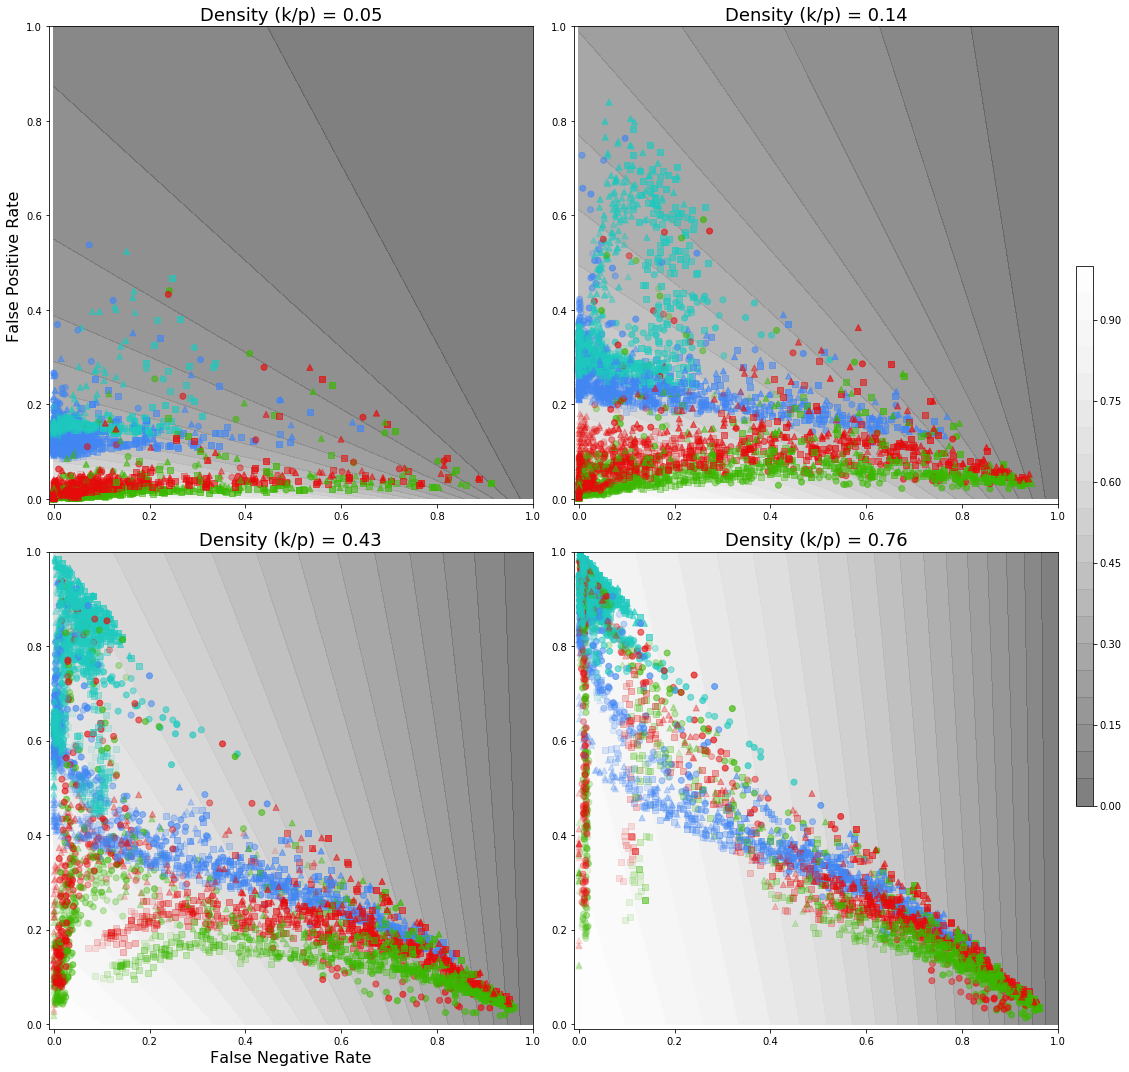

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[3], sparsity[7], sparsity[11], sparsity[13]]
kappa_ = kappa
# Fix the number of samples!
np_ratio = 4
dframes = [lasso, mcp, scad, en]
selection_method = 'CV'

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Superimpose contours of constant selection accuracy
    xx = np.linspace(0, 1, 100)
    yy = np.linspace(0, 1, 100)
    z = np.zeros((100, 100))
    for ix, x in enumerate(xx):
        for iy, y in enumerate(yy):
            z[ix, iy] = 1 - ((1 - s)* y + s * x)/(s * (2 - x - y) + y) 
    
    cmap = plt.get_cmap('Greys_r')
    cmap_new = truncate_colormap(cmap, minval = 0.25)
    cs = a.contourf(xx, yy, z.T, 20, cmap = cmap_new, alpha = 0.75)

    # Set opacity via average correlation    
    for j, k in enumerate(kappa_):
        for ii, bw in enumerate([-1, np.inf, 0.1]):   
            for cidx, df in enumerate(dframes):
                fil_df = apply_df_filters(df, sparsity=s, selection_method = selection_method, 
                                                kappa = k, betawidth=bw, np_ratio=np_ratio)
                a, scat = FNR_FPR_scatter(a, fil_df, cols[cidx], marker = markers[ii])
        
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)

ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.tight_layout()
plt.savefig('fprvfnr_R2.pdf', bbox_inches = 'tight', pad_inches=0)

### What is driving the branching structure above?

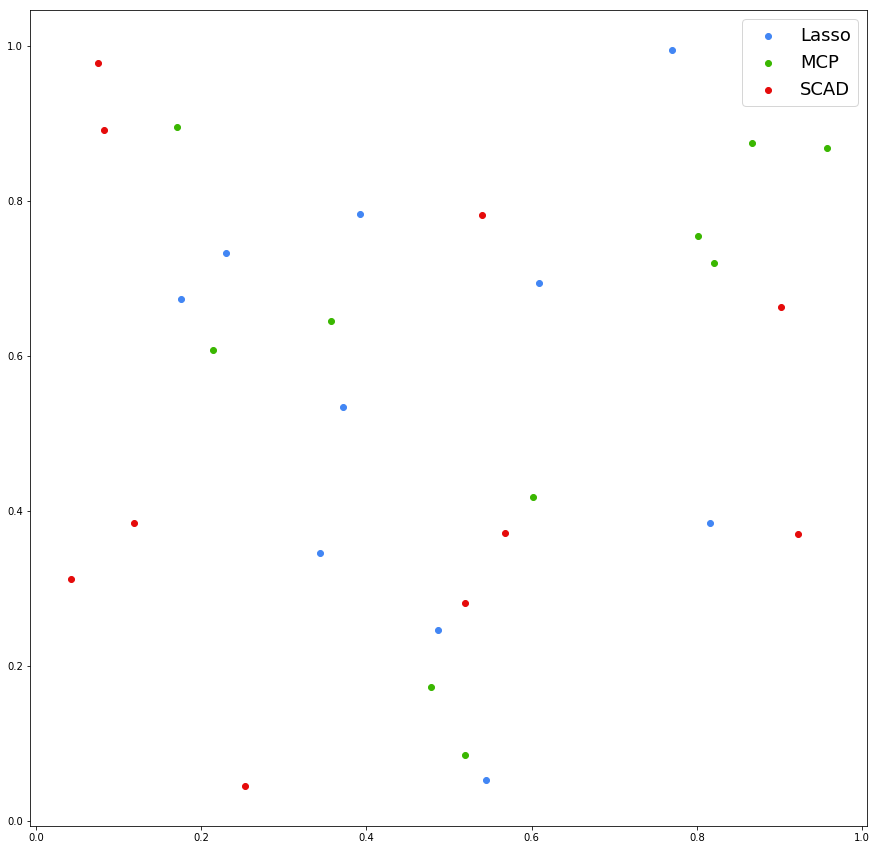

In [16]:
# Dummy plot to get a colormap
fig, ax = plt.subplots(figsize=(15, 15))
for cidx, df in enumerate(dframes):
    ax.scatter(np.random.random(10), np.random.random(10), c = cols[cidx])
plt.legend(['Lasso', 'MCP', 'SCAD'], fontsize=18)
plt.savefig('scatter_legend.pdf', bbox_inches='tight', pad_inches=0)

In [53]:
# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0], 'k', c4[1], c3[1]]

In [41]:
# Linestyles
linestyles = ['solid', 'dashed', (0, (3, 1, 1, 1))] # densely dash dotted
# Marker styles
markers = ["o", "^", "s", "x", ">"]

# Group information criteria together, CV as dashed, and adaptive as densley dash dotted
pltstyles = [('solid', "o"), ('solid', "^"), ('dashed', 's'), (linestyles[2], 'x'), (linestyles[2], ">")]


In [ ]:
# Enumerate all the cov_params so that we can manually select a 
# few indices

In [16]:
from expanded_ensemble import load_covariance

In [17]:
cov_params = []
for idx in range(80): 
    cov_params.append(load_covariance(idx, params_only=True))
cov_params = pd.DataFrame(cov_params)

In [22]:
from scipy.sparse.linalg import eigsh
from cov_ensemble import calc_irrep_const

In [28]:
perturbed_eta = []
perturbed_rho = []
for idx in range(80, 120):
    sigma, cov_params = load_covariance(idx)
    perturbed_rho.extend(1/eigsh(np.linalg.inv(sigma), 1, 
                                 which='LM', return_eigenvectors=False, maxiter=10000))

In [32]:
perturbed_rho[15]

0.12261434903164041

In [30]:
np.argsort(perturbed_rho)

array([25, 37, 38, 15, 24, 36,  9, 23, 35, 13, 26, 39, 27, 34, 22, 14,  8,
       33,  2,  5, 21, 10,  6,  3, 17, 29, 20, 32, 28, 16,  7,  1, 12, 31,
        0,  4, 19, 11, 18, 30])

In [19]:
c1 = apply_df_filters(cov_params, block_size=50, L = 1, t = 0)

In [22]:
c2 = apply_df_filters(cov_params, correlation=0, block_size=100, L =100)

In [50]:
selection_methods = np.unique(lasso['selection_method'].values)

In [51]:
selection_methods = ['AIC', 'AIC_ols', 'BIC', 'BIC_ols', 'CV', 'empirical_bayes', 'gMDL', 'oracle']

array(['AIC', 'AIC_ols', 'BIC', 'BIC_ols', 'CV', 'empirical_bayes',
       'gMDL', 'oracle'], dtype=object)

Text(0.5, 0, 'Model Density (k/p)')

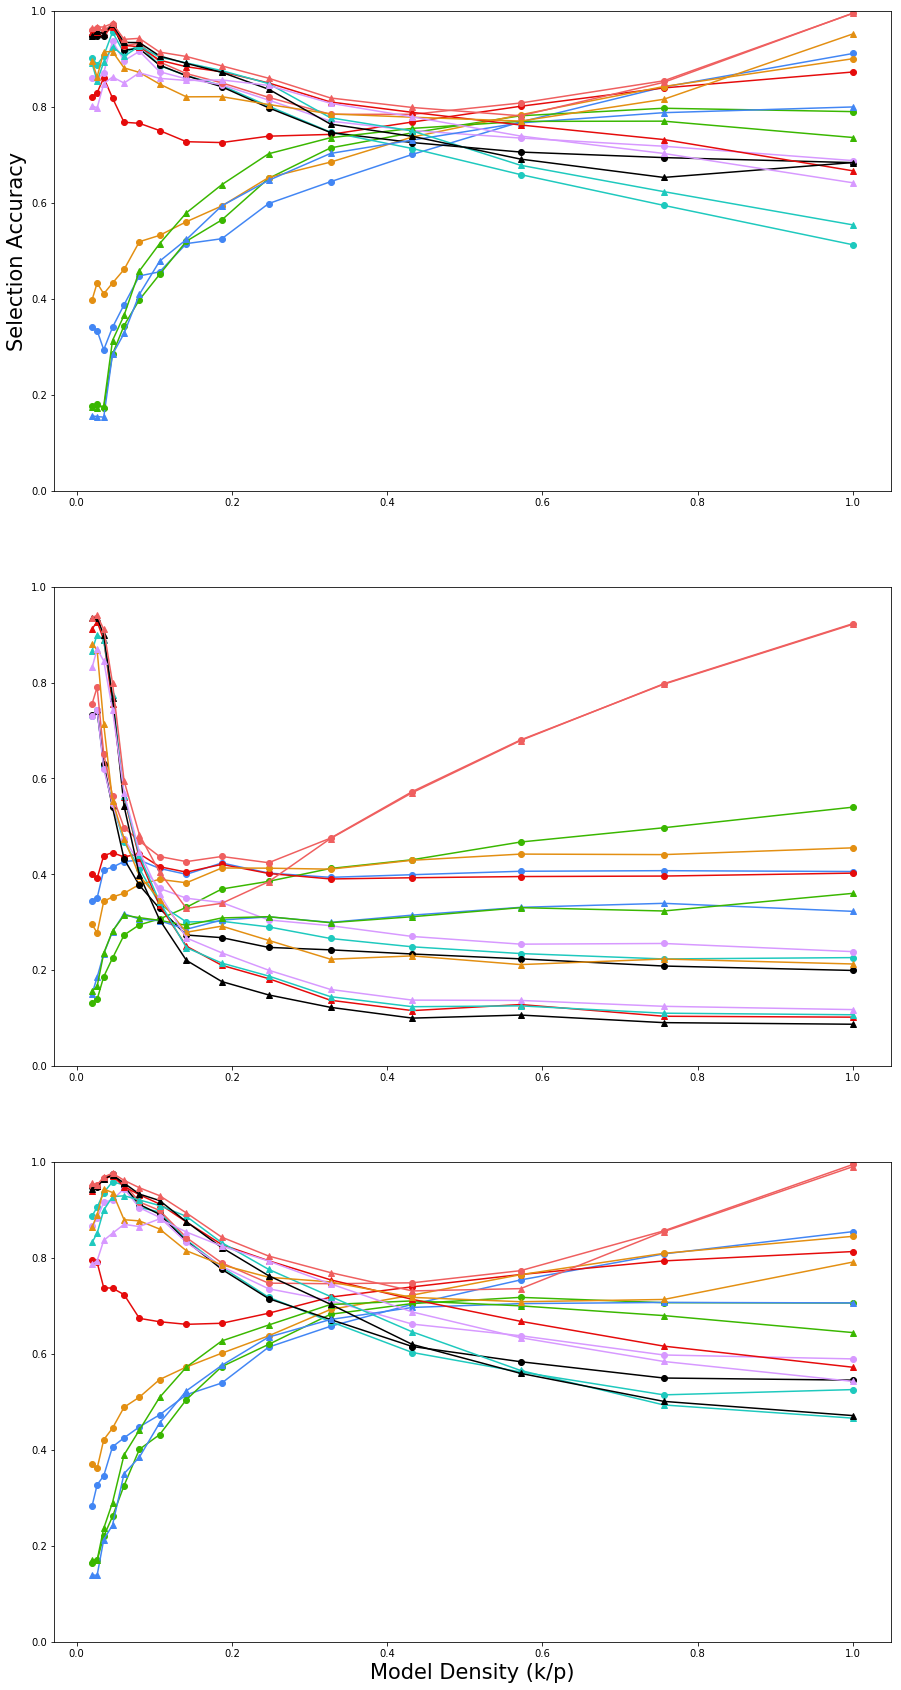

In [55]:
# For 3 different covariance matrices, plot selection accuracy vs sparsity for all algorithms and all selection methods
fig, ax = plt.subplots(3, 1, figsize = (15, 30))

# Manually selected cov_params
#cov_params = [[0.15811388, 50.0, 1.0, 0.0], [0.0, 100.0, 100.0, 0.8897894862254017], [0.15811388, 50.0, 100.0, 0.7972883364187614]]
cidx1 = 27
cidx2 = 38
cidx3 = 94

cidxs = [cidx1, cidx2, cidx3]

# Fix the np_ratio, signal to noise, and betawidth
np_ratio = 4
kappa = 5
betawidth = np.inf

sparsity = np.unique(lasso['sparsity'].values)
dframes = [lasso, mcp]

# Use the same colors for each algorithm, different line style/marker combinations for each selection method
colors = []

for i1 in range(len(cidxs)):
    
    a = ax[i1]
    
    for i2, df in enumerate(dframes):
        
        df_ = apply_df_filters(df, np_ratio = np_ratio, 
                               cov_idx=cidxs[i1],
                               kappa = kappa,
                               betawidth=betawidth)
        

        for i3, sm in enumerate(selection_methods):
    
            df_sm = apply_df_filters(df_, selection_method = sm)
        
            # Now average over the remaining degrees of freedom
            s, yvals, yerr = marginalize(df_sm, 'sa', ['sparsity'])
            
            # Extract and order
            s = np.array([val for sublist in s for val in sublist])
            yvals = yvals[0]
            yerr = yerr[0]
                        
            sorder = np.argsort(s)
            s = s[sorder]
            yvals = yvals[sorder]
            yerr = yerr[sorder]
            a.plot(s, yvals, marker = pltstyles[i2][1], linestyle = pltstyles[i2][0], color=cols[i3])
            a.set_ylim([0, 1])
            
ax[0].set_ylabel('Selection Accuracy', fontsize = 21)
ax[2].set_xlabel('Model Density (k/p)', fontsize = 21)

# plt.savefig('selection_method_comparisons.pdf', bbox_inches='tight', pad_inches=0)

# Add the perturbed matrix

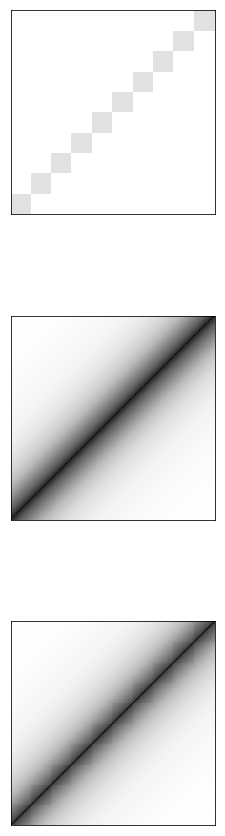

In [32]:
fig, ax = plt.subplots(3, 1, figsize = (7, 15))
cov_params = [[0.15811388, 50.0, 1.0, 0.0], [0.0, 100.0, 100.0, 0.8897894862254017], [0.15811388, 50.0, 100.0, 0.7972883364187614]]

for i in range(len(cov_params)): 
    
    block_size = int(cov_params[i][1])
    sigma = gen_covariance(500, cov_params[i][0], block_size, cov_params[i][2], cov_params[i][3]).T
    if i == 0:
        ax[i].pcolormesh(sigma.T, vmin = 0, vmax = 0.75, cmap = 'Greys')
    else:
        ax[i].pcolormesh(sigma.T, vmin = 0, vmax = 1, cmap = 'Greys')
    ax[i].set_aspect('equal')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.subplots_adjust(hspace = 0.5)
plt.savefig('cov_reference.pdf', bbox_inches='tight', pad_inches=0)

In [36]:
np_ratios = np.unique(lasso['np_ratio'].values)

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [63]:
%matplotlib notebook

In [66]:
np_ratios

array([ 2,  4,  6,  8, 16], dtype=int64)

In [74]:
np.unique(lasso['kappa'].values)

array([1, 2, 5], dtype=int64)

<IPython.core.display.Javascript object>


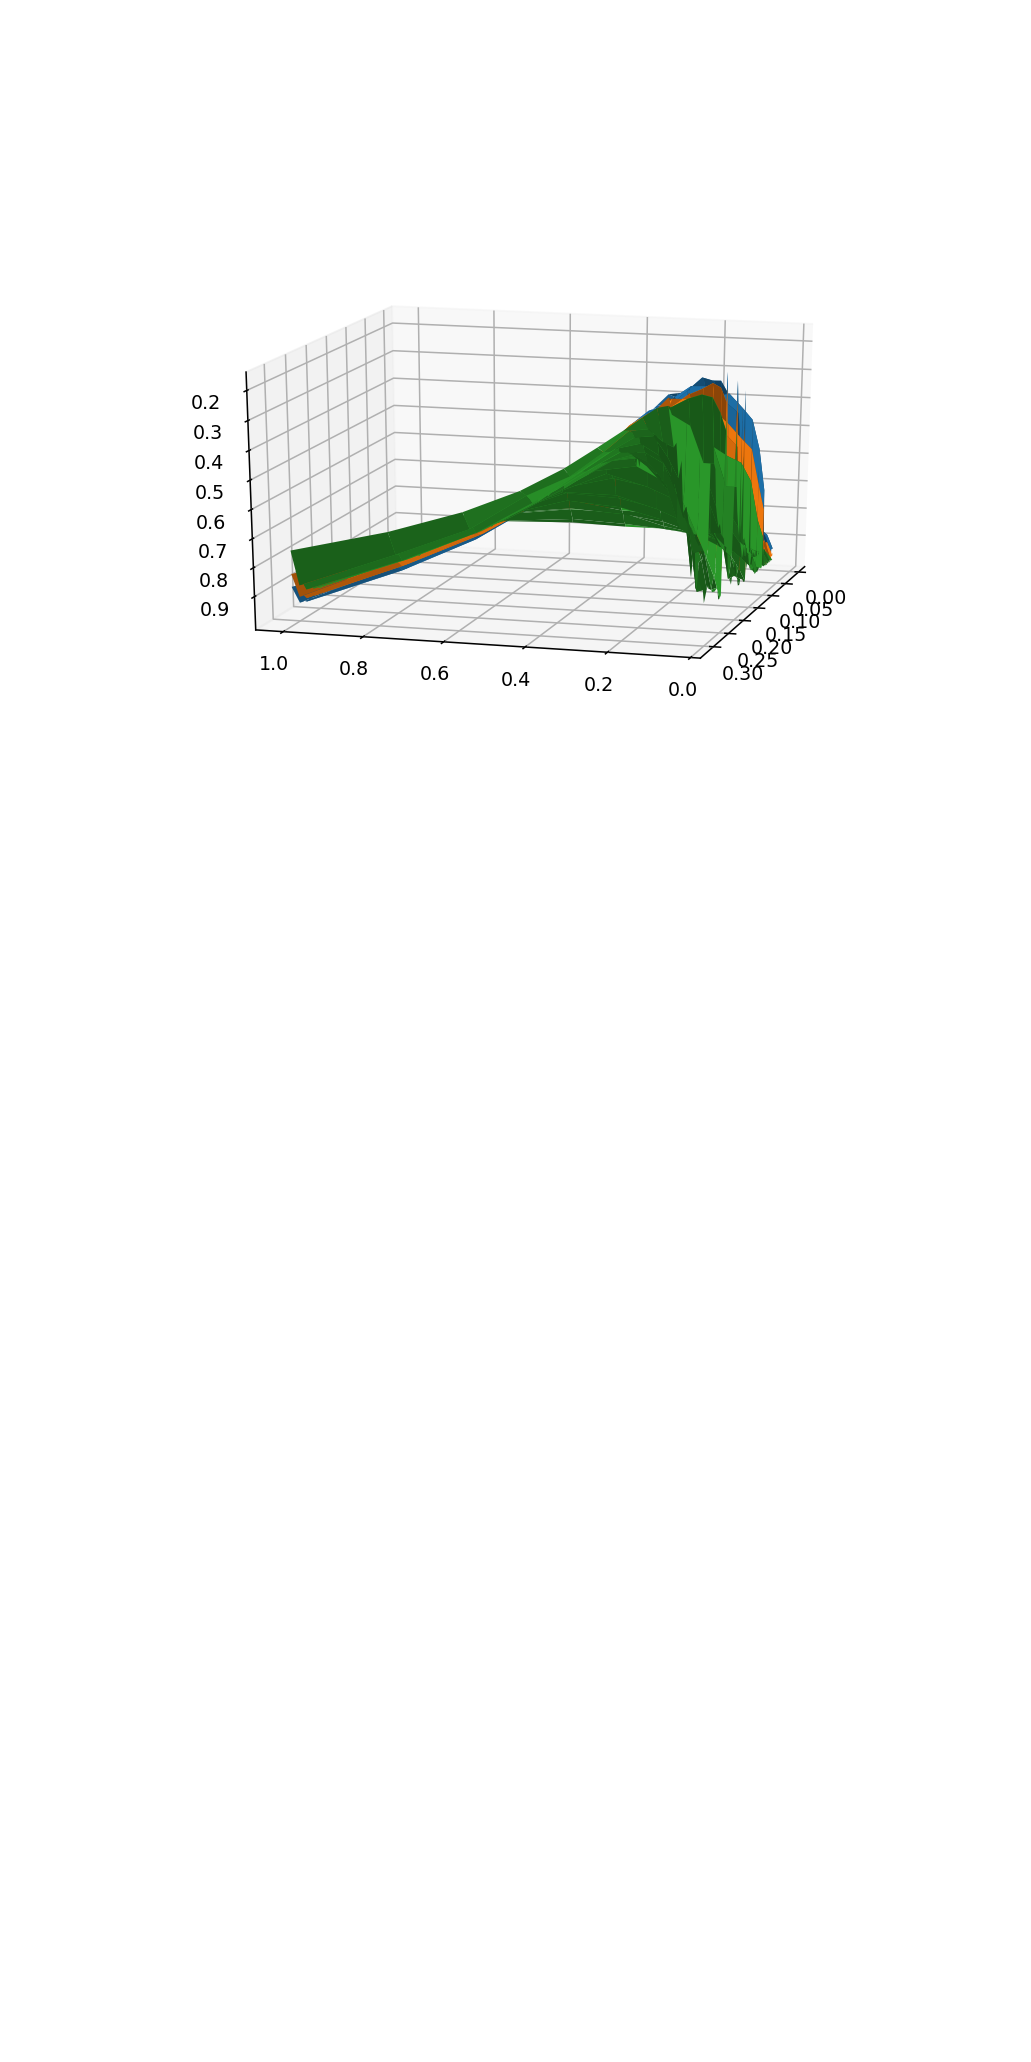

In [78]:
# Next plot type: Plot 2D surfaces of the oracle selection accuracy (achieved on at least 15/20 repetitions) for the different 
# n/p ratios vs. sparsity and average correlation

fig = plt.figure(figsize = (7.5, 15))

# Fix the signal to noise ratio for now 
np_ratio = 4

for i1, df in enumerate([lasso]):

    a = fig.add_subplot(3, 1, i1 + 1, projection='3d')
    for i2, kappa in enumerate([1, 2, 5]):
        df_ = apply_df_filters(df, kappa=kappa, np_ratio=np_ratio, betawidth=np.inf, selection_method='g')
        sparsity_corr_2D(a, df_, 'sa')

C:\Users\akumar\Anaconda3\envs\nse\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


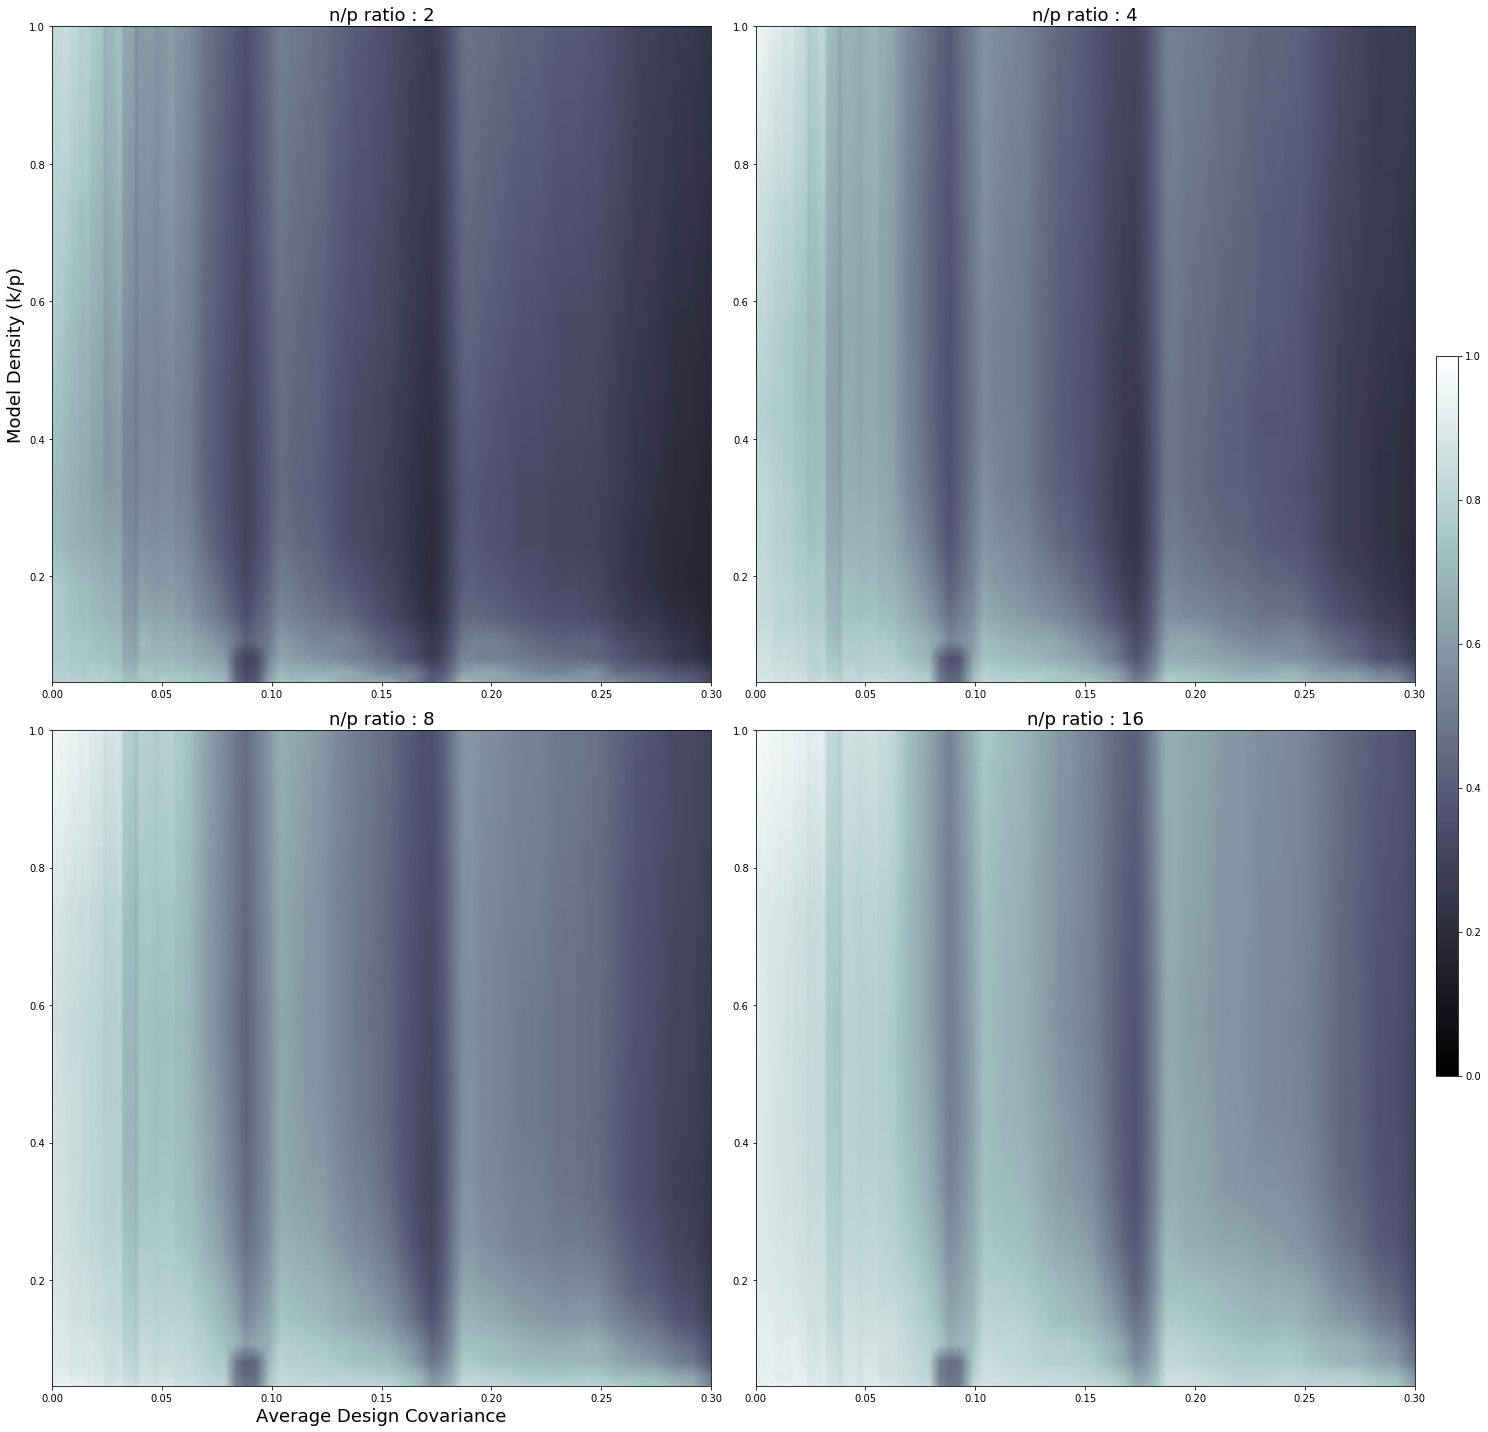

In [7]:
# Surfaces aren't really working out --> What we can do instead is to take the maximum (average) selection accuracy across all
# algorithms and plot colormaps as a function of sparsity and average correlation. Apply some smoothing to average correlation,
# and do some interpolation for sparsity. Then, plot these as panels for the the different n/p ratios OR signal to nosie, 
# depending on what exhibits greater variation

fig, ax = plt.subplots(2, 2, figsize = (20, 20))

for i1, np_ratio in enumerate([2, 4, 8, 16]):
    df = apply_df_filters(mcp, np_ratio = np_ratio, betawidth = np.inf, kappa = 5)
    h = sparsity_corr_2D_2(ax[np.unravel_index(i1, (2, 2))], df, 'sa')
    ax[np.unravel_index(i1, (2, 2))].set_title('n/p ratio : %d' % np_ratio, fontsize = 18)
    
ax[0, 0].set_ylabel('Model Density (k/p)', fontsize = 18)
ax[1, 0].set_xlabel('Average Design Covariance', fontsize = 18)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(h, cax = cax)
plt.tight_layout()
plt.savefig('n_scaling.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Estimation bias/variance
# Selection variance

In [6]:
import h5py

In [8]:
# beta_hat_paths = ['/home/akumar/nse/data/sfn/lasso_beta_hat.h5',
#                   '/home/akumar/nse/data/sfn/mcp_beta_hat.h5',
#                   '/home/akumar/nse/data/sfn/scad_beta_hat.h5']
# beta_hat_paths = ['./lasso_beta_hat.h5', './mcp_beta_hat.h5', './scad_beta_hat.h5',
#                  './en_beta_hat.h5', './uoi_beta_hat.h5']
beta_hat_paths = ['./en_beta_hat.h5', './uoi_beta_hat.h5']


In [41]:
def calc_est_bias(dframe, beta_hat_path, beta_path, unravel_indices):
    
    values_of_interest = dframe[['sparsity', 'L', 't', 'correlation', 'block_size']].to_dict('records')
    unique_values, rep_idxs = group_dictionaries(values_of_interest, None)
    
    est_bias = np.zeros(len(rep_idxs))
    
    with h5py.File(beta_hat_path, 'r') as f:
        with h5py.File(beta_path, 'r') as g:
            for j, rep_idx in enumerate(rep_idxs):
                df_ = dframe.iloc[rep_idx]
                row_indices = np.array(list(df_.index))

                # Convert row indices to 2D indices
                if unravel_indices:
                    row_indices = np.unravel_index(row_indices, (f['beta_hat'].shape[0], f['beta_hat'].shape[1]))            

                    # Load the corresponding rows of beta hat
                    beta_hat = np.array([f['beta_hat'][row_indices[0][i], row_indices[1][i], :] 
                                         for i in range(row_indices[0].size)])

                    beta = np.array([g['beta'][row_indices[0][i], row_indices[1][i], :] 
                                     for i in range(row_indices[0].size)])
                else:
                    
                    beta_hat = np.array([f['beta_hat'][row_indices[i], :] for i in range(row_indices.size)])
                    beta = np.array([g['beta'][row_indices[i], :] for i in range(row_indices.size)])
                
                # Bias per element on the common support
                normalized_bias = np.zeros(beta.shape[0])
                for k in range(beta.shape[0]):
                    common_support = \
                    list(set(np.nonzero(beta[k, :])[0]).intersection(set(np.nonzero(beta_hat[k, :])[0])))
                    normalized_bias[k] = np.linalg.norm(beta_hat[k, common_support] - beta[k, common_support])/len(common_support)
                est_bias[j] = np.mean(normalized_bias)
#                est_bias[j] = np.linalg.norm(np.mean(beta_hat - beta, axis = 0))

    return est_bias    

In [32]:
def calc_est_variance(dframe, beta_hat_path, unravel_indices):
    
    values_of_interest = dframe[['sparsity', 'L', 't', 'correlation', 'block_size']].to_dict('records')
    unique_values, rep_idxs = group_dictionaries(values_of_interest, None)
    
    est_var = np.zeros(len(rep_idxs))
    
    with h5py.File(beta_hat_path) as f:
        
        for j, rep_idx in enumerate(rep_idxs):
            df_ = dframe.iloc[rep_idx]
            row_indices = np.array(list(df_.index))
            
            # Convert row indices to 2D indices
            if unravel_indices:
                row_indices = np.unravel_index(row_indices, (f['beta_hat'].shape[0], f['beta_hat'].shape[1]))            
    
                # Load the corresponding rows of beta hat
                beta_hat = np.array([f['beta_hat'][row_indices[0][i], row_indices[1][i], :] 
                                     for i in range(row_indices[0].size)])
            else:

                beta_hat = np.array([f['beta_hat'][row_indices[i], :] for i in range(row_indices.size)])
            
            est_var[j] = np.mean(np.diag(np.cov(beta_hat.T)))
    return est_var    

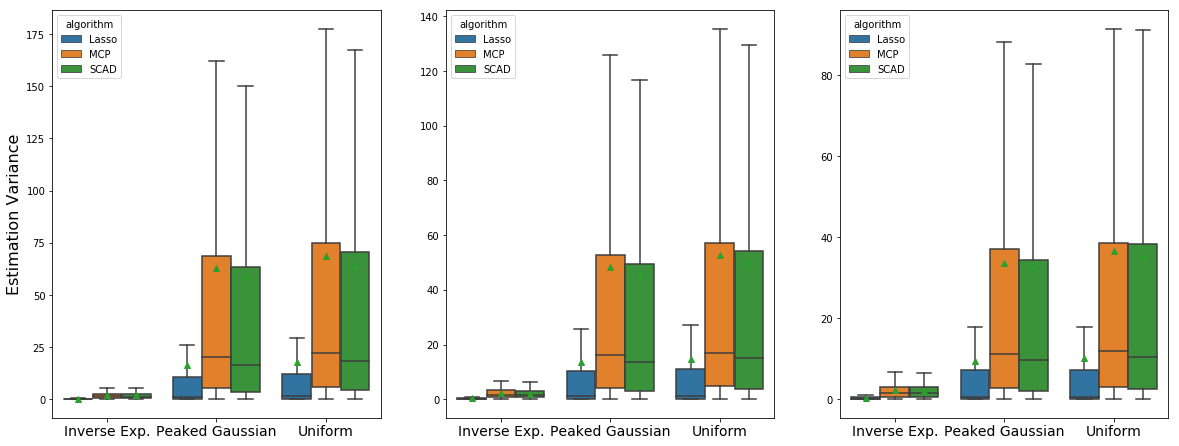

In [50]:
# Plot bar for the different algorithms, averaged over all instances

fig, ax = plt.subplots(1, 3, figsize = (20, 7.5))

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
kappa = np.unique(lasso['kappa'].values)
betawidth = np.unique(lasso['betawidth'].values)
selection_method = 'BIC'

dframes = [lasso, mcp, scad]
dframe_names = ['Lasso', 'MCP', 'SCAD']
beta_path = '/home/akumar/nse/data/sfn/sfn_beta.h5'

beta_hat_paths = ['/home/akumar/nse/data/sfn/lasso_beta_hat.h5',
                  '/home/akumar/nse/data/sfn/mcp_beta_hat.h5',
                  '/home/akumar/nse/data/sfn/scad_beta_hat.h5']

# Estimation variance 

# Select indices
for i1, k in enumerate(kappa):
    est_var = []
    for i2, bw in enumerate(betawidth):
        for i3, dframe in enumerate(dframes):
            df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, 
                                  betawidth=bw, selection_method=selection_method)
            # Calculate variances across reps
            values = calc_est_variance(df, beta_hat_paths[i3])
            dat_list = [[dframe_names[i3], bw, value] for value in values]
            est_var.extend(dat_list)

    # Create new dataframe for plotting
    plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
    sns.boxplot(x='betawidth', y ='est_var', hue='algorithm', data=plt_df, ax = ax[i1],
                showmeans=True, showfliers=False)
    ax[i1].set_xlabel('')
    ax[i1].set_ylabel('')
    ax[i1].set_xticklabels(['Inverse Exp.', 'Peaked Gaussian', 'Uniform'], fontsize = 14)

ax[0].set_ylabel('Estimation Variance', fontsize = 16)
plt.savefig('estvar.pdf', bbox_inches='tight', pad_inches=0)

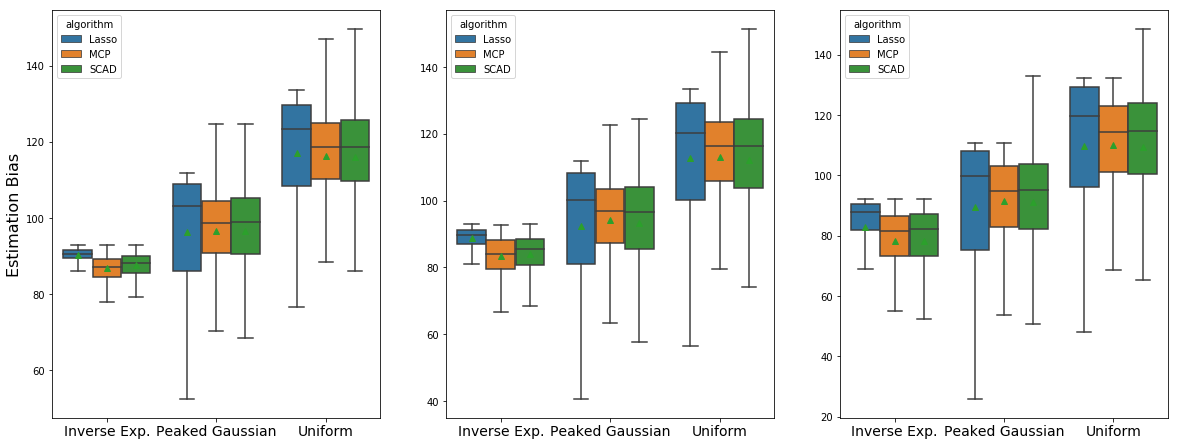

In [74]:
# Plot bar for the different algorithms, averaged over all instances

fig, ax = plt.subplots(1, 3, figsize = (20, 7.5))

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
kappa = np.unique(lasso['kappa'].values)
betawidth = np.unique(lasso['betawidth'].values)
selection_method = 'BIC'

dframes = [lasso, mcp, scad]
dframe_names = ['Lasso', 'MCP', 'SCAD']
beta_path = ['/home/akumar/nse/data/sfn/lasso2_beta.h5',
             '/home/akumar/nse/data/sfn/mcp2_beta.h5',
             '/home/akumar/nse/data/sfn/scad2_beta.h5']

beta_hat_paths = ['/home/akumar/nse/data/sfn/lasso_beta_hat.h5',
                  '/home/akumar/nse/data/sfn/mcp_beta_hat.h5',
                  '/home/akumar/nse/data/sfn/scad_beta_hat.h5']

# Estimation variance 

# Select indices
for i1, k in enumerate(kappa):
    est_var = []
    for i2, bw in enumerate(betawidth):
        for i3, dframe in enumerate(dframes):
            df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, 
                                  betawidth=bw, selection_method=selection_method)
            # Calculate variances across reps
            values = calc_est_bias(df, beta_hat_paths[i3], beta_path[i3])
            dat_list = [[dframe_names[i3], bw, value] for value in values]
            est_var.extend(dat_list)

    # Create new dataframe for plotting
    plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
    sns.boxplot(x='betawidth', y ='est_var', hue='algorithm', data=plt_df, ax = ax[i1],
                showmeans=True, showfliers=False)
    ax[i1].set_xlabel('')
    ax[i1].set_ylabel('')
    ax[i1].set_xticklabels(['Inverse Exp.', 'Peaked Gaussian', 'Uniform'], fontsize = 14)

ax[0].set_ylabel('Estimation Bias', fontsize = 16)


# Estimation variance 

# Select indices
for i1, k in enumerate(kappa):
    est_var = []
    for i2, bw in enumerate(betawidth):
        for i3, dframe in enumerate(dframes):
            df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, 
                                  betawidth=bw, selection_method=selection_method)
            # Calculate variances across reps
            values = calc_est_variance(df, beta_hat_paths[i3])
            dat_list = [[dframe_names[i3], bw, value] for value in values]
            est_var.extend(dat_list)

    # Create new dataframe for plotting
    plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
    sns.boxplot(x='betawidth', y ='est_var', hue='algorithm', data=plt_df, ax = ax[i1],
                showmeans=True, showfliers=False)
    ax[i1].set_xlabel('')
    ax[i1].set_ylabel('')
    ax[i1].set_xticklabels(['Inverse Exp.', 'Peaked Gaussian', 'Uniform'], fontsize = 14)

ax[0].set_ylabel('Estimation Variance', fontsize = 16)



plt.savefig('estbias.pdf', bbox_inches='tight', pad_inches=0)

In [35]:
betawidth

array([-1. ,  0.1,  inf])

Text(0, 0.5, 'Estimation Variance')

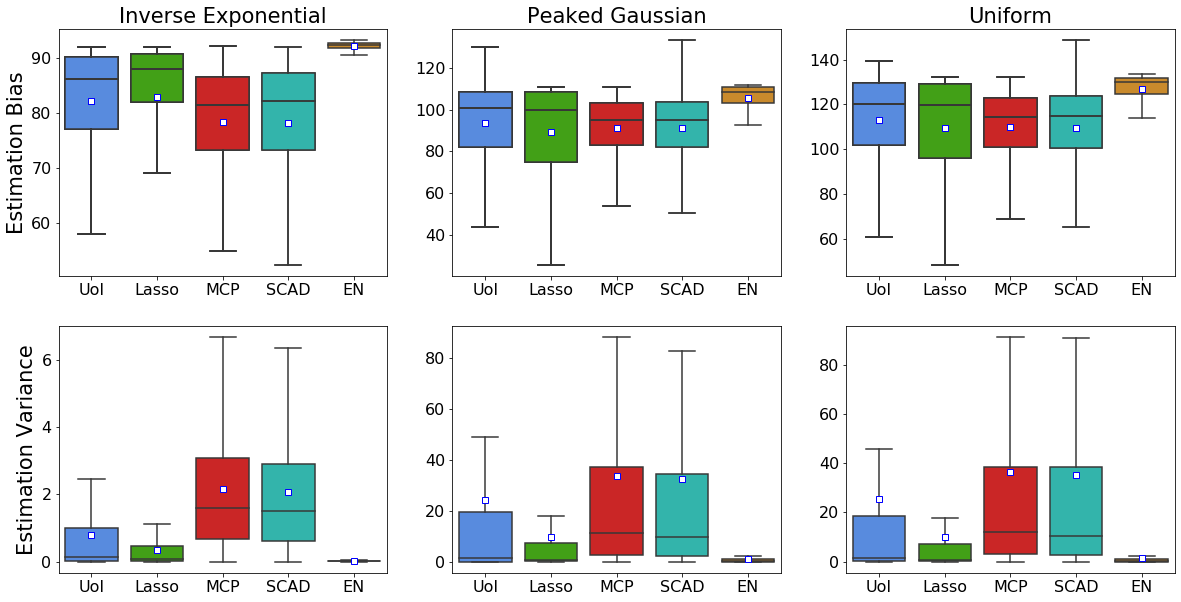

In [14]:
# Combine both plots into a single one

# Plot bar for the different algorithms, averaged over all instances

fig, ax = plt.subplots(2, 3, figsize = (20, 10))

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
k = 5
kappa = np.unique(lasso['kappa'].values)
betawidth = np.unique(lasso['betawidth'].values)
selection_method = 'BIC'

dframes = [uoi, lasso, mcp, scad, en]
#dframes = [uoi, en]
dframe_names = ['UoI', 'Lasso', 'MCP', 'SCAD', 'EN']

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

pal_colors = cols
#dframe_names = ['UoI', 'Elastic Net']
# beta_path = ['./uoi_beta.h5',
#             './lasso2_beta.h5',
#              './mcp2_beta.h5',
#              './scad2_beta.h5',
#             './en_beta.h5']

# beta_hat_paths = ['./uoi_beta_hat.h5',
#                   './lasso_beta_hat.h5',
#                   './mcp_beta_hat.h5',
#                   './scad_beta_hat.h5',
#                     './en_beta_hat.h5']

beta_path = ['/mnt/sdb1/uoi_beta.h5',
            '/mnt/sdb1/lasso2_beta.h5',
             '/mnt/sdb1/mcp2_beta.h5',
             '/mnt/sdb1/scad2_beta.h5',
            '/mnt/sdb1/en_beta.h5']

beta_hat_paths = ['/mnt/sdb1/uoi_beta_hat.h5',
                  '/mnt/sdb1/lasso_beta_hat.h5',
                  '/mnt/sdb1/mcp_beta_hat.h5',
                  '/mnt/sdb1/scad_beta_hat.h5',
                  '/mnt/sdb1/en_beta_hat.h5']


unravel_indices = [False, True, True, True, False]
# Estimation Bias

# Select indices
for i2, bw in enumerate(betawidth):
    est_var = []
    for i3, dframe in enumerate(dframes):
        df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, 
                              betawidth=bw, selection_method=selection_method)
        # Calculate variances across reps
        values = calc_est_bias(df, beta_hat_paths[i3], beta_path[i3], unravel_indices[i3])
        dat_list = [[dframe_names[i3], bw, value] for value in values]
        est_var.extend(dat_list)

        # Create new dataframe for plotting
        plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
        bpl = sns.boxplot(x='algorithm', y ='est_var', data=plt_df, ax = ax[0, i2],
                    showmeans=True, showfliers=False, palette = sns.color_palette(pal_colors),
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
#        bpl.legend_.remove()
        ax[0, i2].set_xlabel('')
        ax[0, i2].set_ylabel('')
        ax[0, i2].set_xticklabels(dframe_names)
        ax[0, i2].tick_params(axis="y", labelsize=16)
        ax[0, i2].tick_params(axis="x", labelsize=16)
ax[0, 0].set_ylabel('Estimation Bias', fontsize = 21)
ax[0, 0].set_title('Inverse Exponential', fontsize = 21)
ax[0, 1].set_title('Peaked Gaussian', fontsize = 21)
ax[0, 2].set_title('Uniform', fontsize = 21)
# Estimation variance 

# Select indices
for i2, bw in enumerate(betawidth):
    est_var = []
    for i3, dframe in enumerate(dframes):
        df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, 
                              betawidth=bw, selection_method=selection_method)
        # Calculate variances across reps
        values = calc_est_variance(df, beta_hat_paths[i3], unravel_indices[i3])
        dat_list = [[dframe_names[i3], bw, value] for value in values]
        est_var.extend(dat_list)

    # Create new dataframe for plotting
    plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
    bpl = sns.boxplot(x='algorithm', y ='est_var', data=plt_df, ax = ax[1, i2],
                showmeans=True, showfliers=False, palette = sns.color_palette(pal_colors),
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
    #    bpl.legend_.remove()
    ax[1, i2].set_xlabel('')
    ax[1, i2].set_ylabel('')
    ax[1, i2].set_xticklabels(dframe_names)
    ax[1, i2].tick_params(axis="y", labelsize=16)
    ax[1, i2].tick_params(axis="x", labelsize=16)
    #    ax[1, i2].set_xticklabels(['Inverse Exp.', 'Peaked Gaussian', 'Uniform'], fontsize = 14)

ax[1, 0].set_ylabel('Estimation Variance', fontsize = 21)
#plt.savefig('est.pdf', bbox_inches='tight', pad_inches=0)

In [22]:
np.unique(lasso['sparsity'].values) == np.unique(uoi['sparsity'].values)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [23]:
sparsity[3]

0.046248217264093394

Text(0, 0.5, 'Estimation Variance')

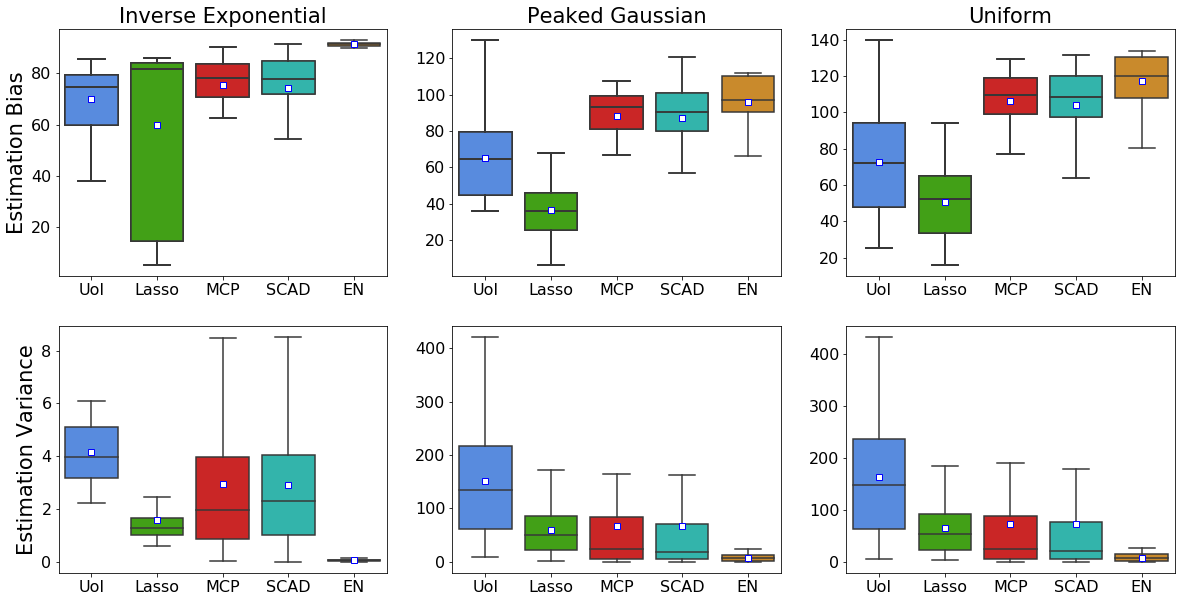

In [25]:
# The issue is likely due to the other algorithms getting to be
# averaged across many more repetititions

# Put things on a level playing field

# Plot bar for the different algorithms, averaged over all instances

fig, ax = plt.subplots(2, 3, figsize = (20, 10))

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
k = 5
kappa = np.unique(uoi['kappa'].values)
betawidth = np.unique(lasso['betawidth'].values)
selection_method = 'BIC'

dframes = [uoi, lasso, mcp, scad, en]
#dframes = [uoi, en]
dframe_names = ['UoI', 'Lasso', 'MCP', 'SCAD', 'EN']

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

pal_colors = cols
#dframe_names = ['UoI', 'Elastic Net']
# beta_path = ['./uoi_beta.h5',
#             './lasso2_beta.h5',
#              './mcp2_beta.h5',
#              './scad2_beta.h5',
#             './en_beta.h5']

# beta_hat_paths = ['./uoi_beta_hat.h5',
#                   './lasso_beta_hat.h5',
#                   './mcp_beta_hat.h5',
#                   './scad_beta_hat.h5',
#                     './en_beta_hat.h5']

beta_path = ['/mnt/sdb1/uoi_beta.h5',
            '/mnt/sdb1/lasso2_beta.h5',
             '/mnt/sdb1/mcp2_beta.h5',
             '/mnt/sdb1/scad2_beta.h5',
            '/mnt/sdb1/en_beta.h5']

beta_hat_paths = ['/mnt/sdb1/uoi_beta_hat.h5',
                  '/mnt/sdb1/lasso_beta_hat.h5',
                  '/mnt/sdb1/mcp_beta_hat.h5',
                  '/mnt/sdb1/scad_beta_hat.h5',
                  '/mnt/sdb1/en_beta_hat.h5']


unravel_indices = [False, True, True, True, False]
# Estimation Bias

# Select indices
for i2, bw in enumerate(betawidth):
    est_var = []
    for i3, dframe in enumerate(dframes):
        df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, sparsity = sparsity[-1],
                              betawidth=bw, selection_method=selection_method)
        # Calculate variances across reps
        values = calc_est_bias(df, beta_hat_paths[i3], beta_path[i3], unravel_indices[i3])
        dat_list = [[dframe_names[i3], bw, value] for value in values]
        est_var.extend(dat_list)

        # Create new dataframe for plotting
        plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
        bpl = sns.boxplot(x='algorithm', y ='est_var', data=plt_df, ax = ax[0, i2],
                    showmeans=True, showfliers=False, palette = sns.color_palette(pal_colors),
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
#        bpl.legend_.remove()
        ax[0, i2].set_xlabel('')
        ax[0, i2].set_ylabel('')
        ax[0, i2].set_xticklabels(dframe_names)
        ax[0, i2].tick_params(axis="y", labelsize=16)
        ax[0, i2].tick_params(axis="x", labelsize=16)
ax[0, 0].set_ylabel('Estimation Bias', fontsize = 21)
ax[0, 0].set_title('Inverse Exponential', fontsize = 21)
ax[0, 1].set_title('Peaked Gaussian', fontsize = 21)
ax[0, 2].set_title('Uniform', fontsize = 21)
# Estimation variance 

# Select indices
for i2, bw in enumerate(betawidth):
    est_var = []
    for i3, dframe in enumerate(dframes):
        df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, sparsity=sparsity[-1], 
                              betawidth=bw, selection_method=selection_method)
        # Calculate variances across reps
        values = calc_est_variance(df, beta_hat_paths[i3], unravel_indices[i3])
        dat_list = [[dframe_names[i3], bw, value] for value in values]
        est_var.extend(dat_list)

    # Create new dataframe for plotting
    plt_df = pd.DataFrame(est_var, columns=['algorithm', 'betawidth', 'est_var'])
    bpl = sns.boxplot(x='algorithm', y ='est_var', data=plt_df, ax = ax[1, i2],
                showmeans=True, showfliers=False, palette = sns.color_palette(pal_colors),
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
    #    bpl.legend_.remove()
    ax[1, i2].set_xlabel('')
    ax[1, i2].set_ylabel('')
    ax[1, i2].set_xticklabels(dframe_names)
    ax[1, i2].tick_params(axis="y", labelsize=16)
    ax[1, i2].tick_params(axis="x", labelsize=16)
    #    ax[1, i2].set_xticklabels(['Inverse Exp.', 'Peaked Gaussian', 'Uniform'], fontsize = 14)

ax[1, 0].set_ylabel('Estimation Variance', fontsize = 21)
#plt.savefig('est.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Likely explanation: Specific matrices causing huge problems

/home/akumar/anaconda3/envs/nse/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'Estimation Variance')

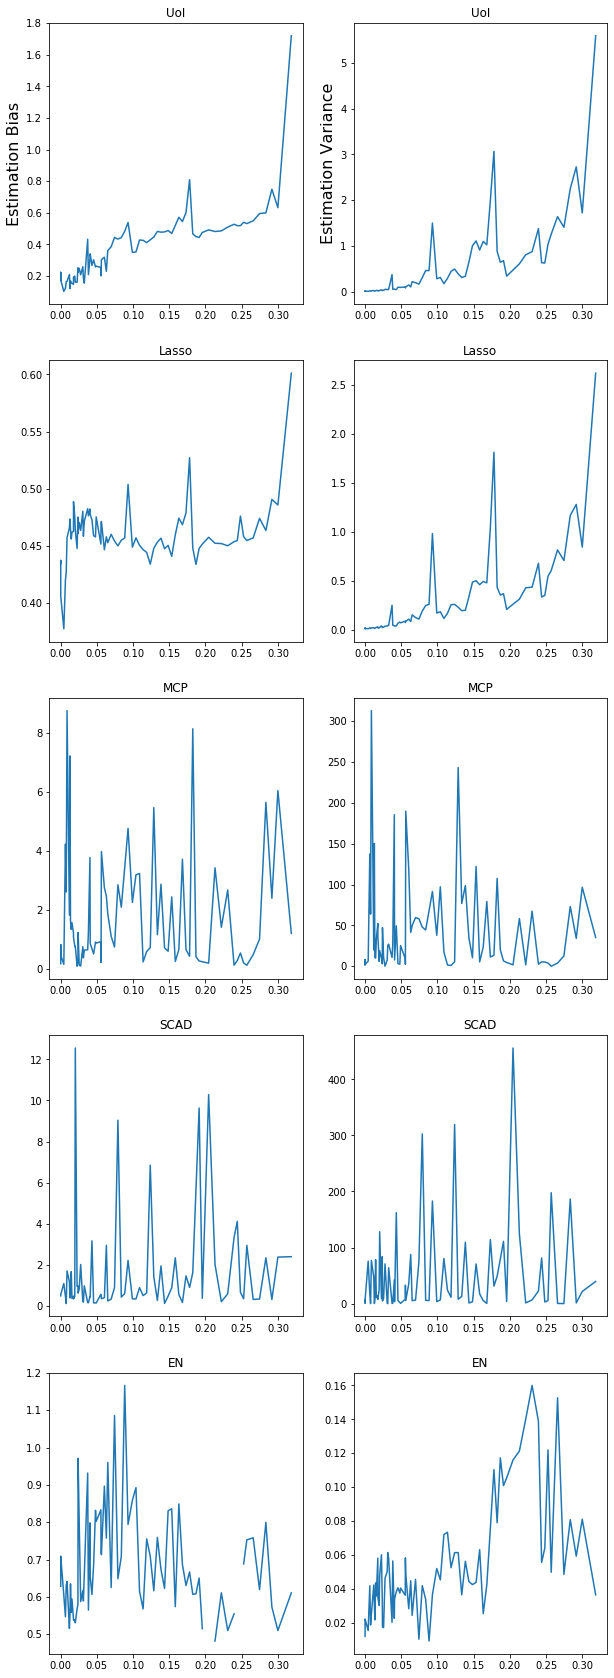

In [44]:

# Put things on a level playing field

# Plot bar for the different algorithms, averaged over all instances

fig, ax = plt.subplots(5, 2, figsize = (10, 30))

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
k = 5
kappa = np.unique(uoi['kappa'].values)
bw = np.inf
selection_method = 'BIC'

dframes = [uoi, lasso, mcp, scad, en]
#dframes = [uoi, en]
dframe_names = ['UoI', 'Lasso', 'MCP', 'SCAD', 'EN']

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

pal_colors = cols
#dframe_names = ['UoI', 'Elastic Net']
# beta_path = ['./uoi_beta.h5',
#             './lasso2_beta.h5',
#              './mcp2_beta.h5',
#              './scad2_beta.h5',
#             './en_beta.h5']

# beta_hat_paths = ['./uoi_beta_hat.h5',
#                   './lasso_beta_hat.h5',
#                   './mcp_beta_hat.h5',
#                   './scad_beta_hat.h5',
#                     './en_beta_hat.h5']

beta_path = ['/mnt/sdb1/uoi_beta.h5',
            '/mnt/sdb1/lasso2_beta.h5',
             '/mnt/sdb1/mcp2_beta.h5',
             '/mnt/sdb1/scad2_beta.h5',
            '/mnt/sdb1/en_beta.h5']

beta_hat_paths = ['/mnt/sdb1/uoi_beta_hat.h5',
                  '/mnt/sdb1/lasso_beta_hat.h5',
                  '/mnt/sdb1/mcp_beta_hat.h5',
                  '/mnt/sdb1/scad_beta_hat.h5',
                  '/mnt/sdb1/en_beta_hat.h5']


unravel_indices = [False, True, True, True, False]

# Estimation Bias
est_var = []
for i3, dframe in enumerate(dframes):
    df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, sparsity = sparsity[5],
                          betawidth=bw, selection_method=selection_method)

    # Plot by unique_cov_params
    ucp, cidxs = unique_cov_params(df)
    values = np.zeros(len(ucp))
    for cidx, cp in enumerate(ucp):
        df_ = apply_df_filters(df, **cp)
        values[cidx] = calc_est_bias(df_, beta_hat_paths[i3], beta_path[i3], unravel_indices[i3])
    
    # order by average correlation
    avg_cov = np.array([calc_avg_cov(500, **cp) for cp in ucp])
    cov_order = np.argsort(avg_cov)
    ax[i3, 0].plot(avg_cov[cov_order], values[cov_order])
    ax[i3, 0].set_title(dframe_names[i3])
    
ax[0, 0].set_ylabel('Estimation Bias', fontsize = 16)

# Estimation variance 

# Select indices
for i3, dframe in enumerate(dframes):
    df = apply_df_filters(dframe, kappa=k, np_ratio=np_ratio, sparsity=sparsity[5], 
                          betawidth=bw, selection_method=selection_method)

    # Plot by unique_cov_params
    ucp, cidxs = unique_cov_params(df)
    values = np.zeros(len(ucp))
    for cidx, cp in enumerate(ucp):
        df_ = apply_df_filters(df, **cp)
        values[cidx] = calc_est_variance(df_, beta_hat_paths[i3], unravel_indices[i3])
    
    # order by average correlation
    avg_cov = np.array([calc_avg_cov(500, **cp) for cp in ucp])
    cov_order = np.argsort(avg_cov)
    ax[i3, 1].plot(avg_cov[cov_order], values[cov_order])
    ax[i3, 1].set_title(dframe_names[i3])
    
ax[0, 1].set_ylabel('Estimation Variance', fontsize = 16)
#plt.savefig('est.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Another sanity check to do is R^2 --> what's up with SCAD/MCP's huge bias/variance? Can we make UoI more 
# competitive with regards to bias/variance with 48 estimation bootstraps as opposed to 24?